In [15]:
import sys
sys.path.append('../')

import os
import pandas as pd
from utils.path_utils import project_root
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import IPython.display as ipd


Train f1: 0.9589138218299126
Dev f1: 0.8861251457442676


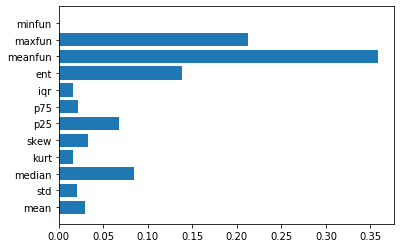

In [21]:

train_data = pd.read_csv(os.path.join(project_root(), 'data', 'processed',
                                      'librispeech-gender-feats-train-clean-100.csv'), sep=';')

dev_data = pd.read_csv(os.path.join(project_root(), 'data', 'processed',
                                    'librispeech-gender-feats-dev-clean.csv'))

train_data = train_data.dropna()
dev_data = dev_data.dropna()

columns = ['mean', 'std', 'median', 'kurt', 'skew', 'p25', 'p75', 'iqr', 'ent', 'meanfun', 'maxfun', 'minfun']

train_y = train_data['label']

le = LabelEncoder()
le.fit(train_data['label'])

y_train = le.transform(train_data['label'])
y_dev = le.transform(dev_data['label'])

x_train = train_data[columns].values
x_dev = dev_data[columns].values

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_dev = scaler.transform(x_dev)

model = LogisticRegression(C=1)
model = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_leaf=8)
model.fit(x_train, y_train)

preds_train = model.predict(x_train)
preds_dev = model.predict(x_dev)

print(f"Train f1: {f1_score(y_train, preds_train)}")
print(f"Dev f1: {f1_score(y_dev, preds_dev)}")

import matplotlib.pylab as plt
plt.figure()
plt.barh(columns, model.feature_importances_)
plt.savefig(os.path.join(project_root(), 'data', 'processed', 'importances.png'))


In [38]:
import soundfile as sf
root = os.path.join(project_root(), 'data', 'raw', 'LibriSpeech')

errors = []
for i, (ref, pred) in enumerate(zip(y_dev, preds_dev)):
    if ref != pred:
        path = dev_data.iloc[i]['path']
        errors.append((le.classes_[ref], le.classes_[pred], path))


In [39]:
ind = 0

print(f"Ref: {errors[ind][0]}, pred: {errors[ind][1]}, {errors[ind][2]}")
samples, fs = sf.read(os.path.join(root, errors[ind][2]))
ipd.Audio(samples, rate=fs)


Ref: M, pred: F, dev-clean/2078/142845/2078-142845-0002.flac


In [40]:
ind = 1

print(f"Ref: {errors[ind][0]}, pred: {errors[ind][1]}, {errors[ind][2]}")
samples, fs = sf.read(os.path.join(root, errors[ind][2]))
ipd.Audio(samples, rate=fs)


Ref: M, pred: F, dev-clean/2078/142845/2078-142845-0050.flac


In [41]:
ind = 2

print(f"Ref: {errors[ind][0]}, pred: {errors[ind][1]}, {errors[ind][2]}")
samples, fs = sf.read(os.path.join(root, errors[ind][2]))
ipd.Audio(samples, rate=fs)


Ref: F, pred: M, dev-clean/1988/24833/1988-24833-0022.flac


In [42]:
ind = 3

print(f"Ref: {errors[ind][0]}, pred: {errors[ind][1]}, {errors[ind][2]}")
samples, fs = sf.read(os.path.join(root, errors[ind][2]))
ipd.Audio(samples, rate=fs)


Ref: F, pred: M, dev-clean/1988/24833/1988-24833-0019.flac


In [43]:
ind = 4

print(f"Ref: {errors[ind][0]}, pred: {errors[ind][1]}, {errors[ind][2]}")
samples, fs = sf.read(os.path.join(root, errors[ind][2]))
ipd.Audio(samples, rate=fs)


Ref: F, pred: M, dev-clean/1988/24833/1988-24833-0023.flac
